In [13]:
#Read the data Frame
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
data = pd.read_csv("data.csv",parse_dates=['Effective To Date'])
data.dtypes

Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

In [6]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000
mean,7988.177822,37787.118654,93.189316,15.079465,48.136501,0.389485,2.965634,432.413355
std,6840.106687,30393.997287,34.498133,10.092616,27.832586,0.915243,2.390264,288.079674
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3982.266087,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,268.819985
50%,5789.850900,34220.000000,83.000000,14.000000,48.000000,0.000000,2.000000,384.000000
75%,8960.280213,62452.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [7]:
data[['State','Education','Coverage','Marital Status','Location Code','Gender','Vehicle Class','Vehicle Size']].describe()

,State,Education,Coverage,Marital Status,Location Code,Gender,Vehicle Class,Vehicle Size
count,8293,8293,8293,8293,8293,8293,8293,8293
unique,5,5,3,3,3,2,6,3
top,Oregon,Bachelor,Basic,Married,Suburban,F,Four-Door Car,Medsize
freq,2535,2498,5041,4818,5225,4252,4213,5819


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48f4d04290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f48f4b67310>]], dtype=object)

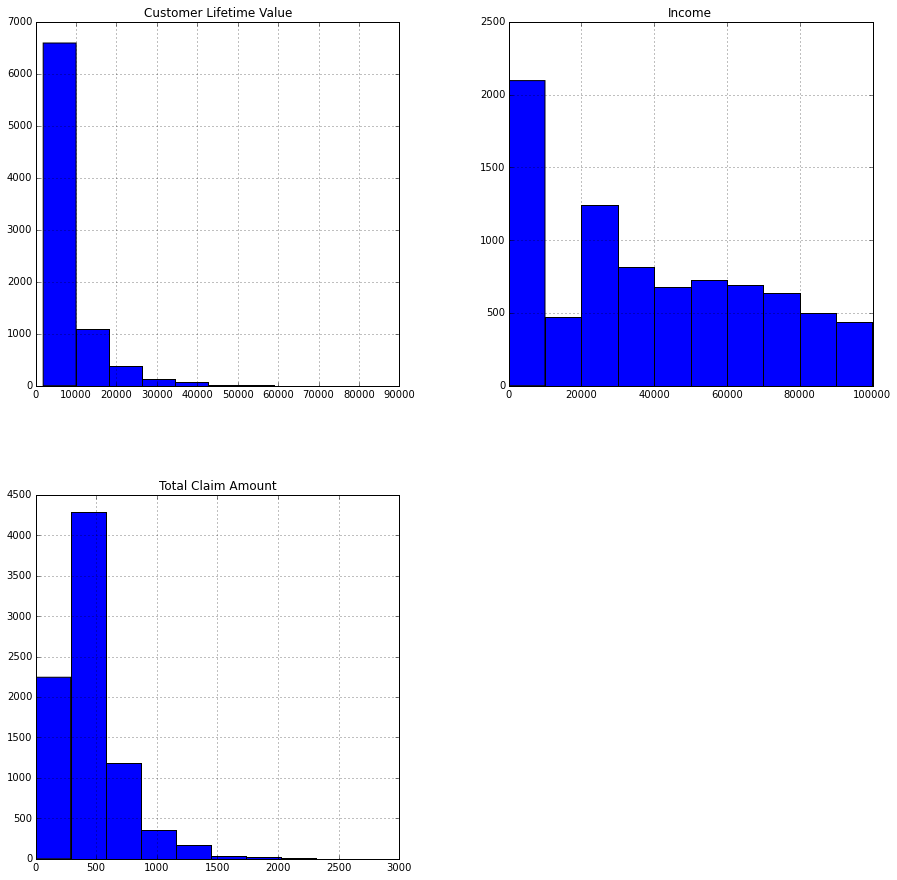

In [50]:
#check general details about the customers
data.hist(['Customer Lifetime Value','Income','Total Claim Amount'],figsize = (15,15))

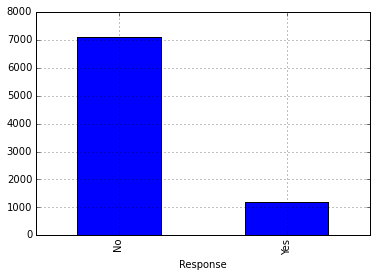

In [8]:
# Total respose
data.groupby(['Response']).size().plot(kind='bar',grid=True)

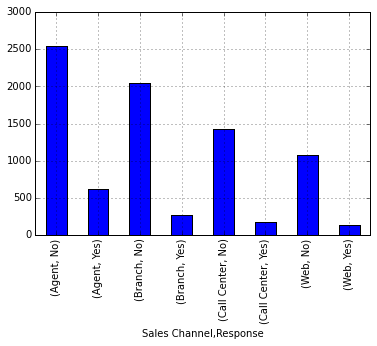

In [9]:
# Sales Channel and Response
data.groupby(['Sales Channel','Response']).size().plot(kind='bar',grid=True)

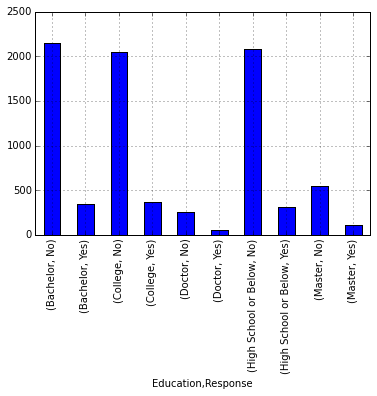

In [10]:
#Education of the users and their response
data.groupby(['Education','Response']).size().plot(kind='bar',grid=True)

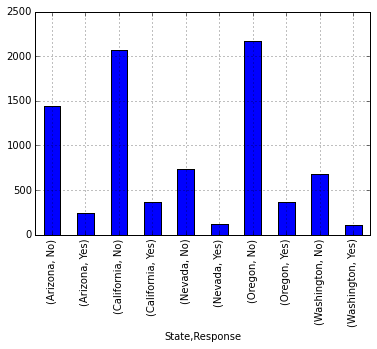

In [11]:
#State of the users and their response
data.groupby(['State', 'Response']).size().plot(kind='bar',grid=True)

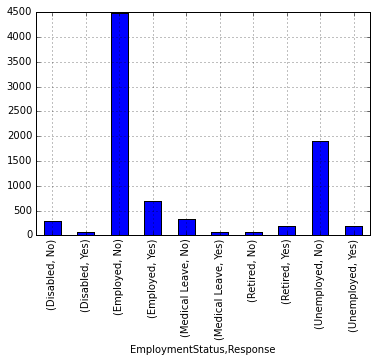

In [12]:
#Employment status of the users and their response
data.groupby(['EmploymentStatus', 'Response']).size().plot(kind='bar',grid=True)

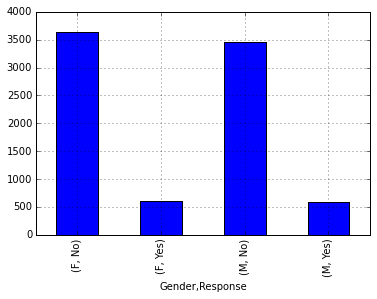

In [81]:
#Gender of the users and response
data.groupby(['Gender','Response']).size().plot(kind='bar',grid=True)

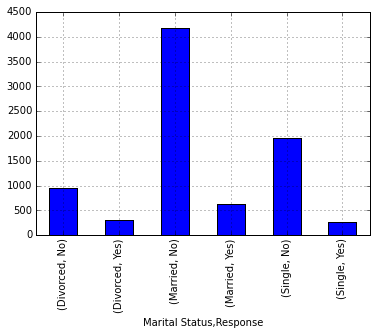

In [100]:
#Marital Status of the users and response
data.groupby(['Marital Status','Response']).size().plot(kind='bar',grid=True)

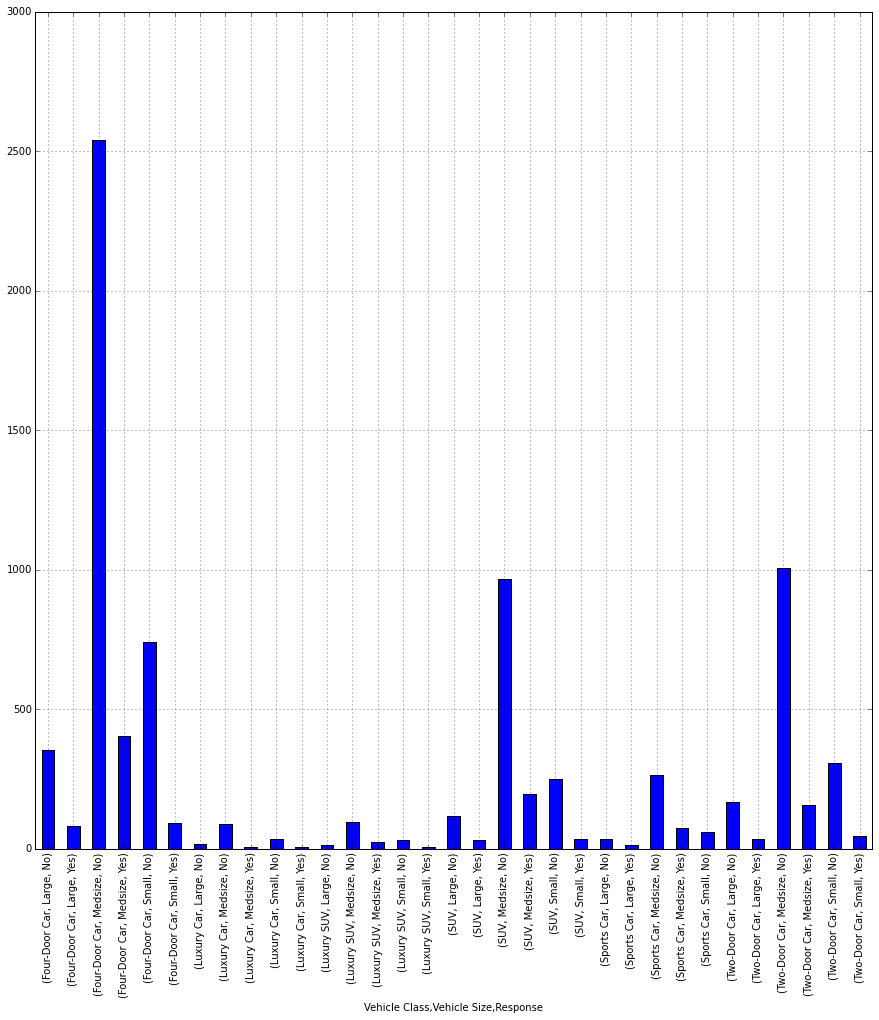

In [83]:
# Which type of cars will be insured more
data.groupby(['Vehicle Class','Vehicle Size','Response']).size().plot(kind='bar',grid=True,figsize=(15,15))

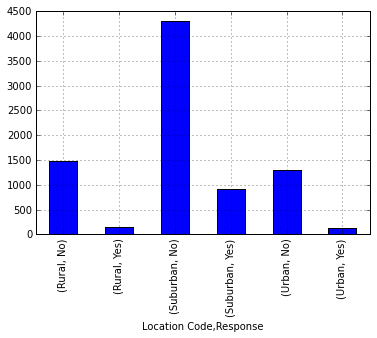

In [87]:
# Location of customer and response
data.groupby(['Location Code','Response']).size().plot(kind='bar',grid=True)

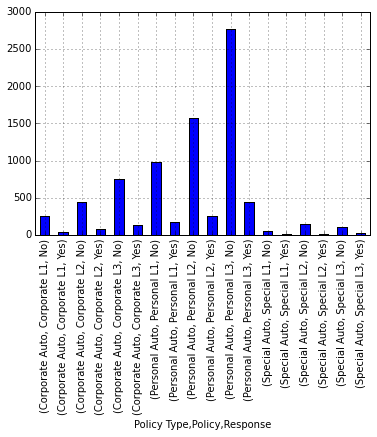

In [99]:
# Policy of customer and response
data.groupby(['Policy Type','Policy','Response']).size().plot(kind='bar',grid=True)

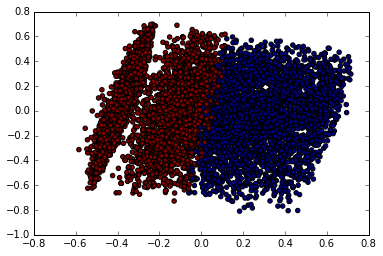

In [219]:
# Form clusters based on the numeric Values 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans_model = KMeans(n_clusters=2, random_state=100)
num_columns = data._get_numeric_data()
num_columns = (num_columns) / (num_columns.max())
kmeans_model.fit(np.array(num_columns))
labels = kmeans_model.labels_

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(num_columns)
plt.scatter(x=plot_columns[:,0],y=plot_columns[:,1],c=labels)
plt.show()

In [190]:
# Correlation Matrix
num_columns.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024054,0.394946,0.012683,0.010993,-0.037188,0.024150,0.215543
Income,0.024054,1.000000,-0.014615,-0.028518,-0.000590,0.006492,-0.010171,-0.352482
Monthly Premium Auto,0.394946,-0.014615,1.000000,0.004063,0.024774,-0.012797,-0.009122,0.629232
Months Since Last Claim,0.012683,-0.028518,0.004063,1.000000,-0.039767,0.005135,0.010071,0.008685
Months Since Policy Inception,0.010993,-0.000590,0.024774,-0.039767,1.000000,0.001066,-0.016192,0.008024
Number of Open Complaints,-0.037188,0.006492,-0.012797,0.005135,0.001066,1.000000,-0.000275,-0.017069
Number of Policies,0.024150,-0.010171,-0.009122,0.010071,-0.016192,-0.000275,1.000000,-0.004794
Total Claim Amount,0.215543,-0.352482,0.629232,0.008685,0.008024,-0.017069,-0.004794,1.000000


[('veryLow_income', (0, 19996.200000000001)),
 ('low_income', (19996.200000000001, 39992.400000000001)),
 ('medium_income', (39992.400000000001, 59988.600000000006)),
 ('high_income', (59988.600000000006, 79984.800000000003)),
 ('veryHigh_income', (79984.800000000003, 99981))]


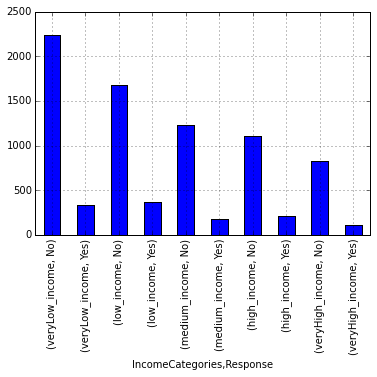

In [194]:
#Income category and response
income = data['Income']
income.fillna(income.mean())
min_income = min(income)
max_income = max(income)
bins = list(np.linspace(min_income,max_income,num=6,endpoint=True))
bins[0]=min_income
bins[5]=max_income
group_names = ['veryLow_income','low_income','medium_income','high_income','veryHigh_income']
pprint(zip(group_names,zip(bins,bins[1:])))
categories = pd.cut(income, bins, labels=group_names,include_lowest=True)
data['IncomeCategories'] = categories
data.groupby(['IncomeCategories','Response']).size().plot(kind='bar',grid=True)

[('low_lifeValue', (1898.0076750000001, 29040.465513333333)),
 ('medium_lifeValue', (29040.465513333333, 56182.923351666665)),
 ('high_lifeValue', (56182.923351666665, 83325.38119))]


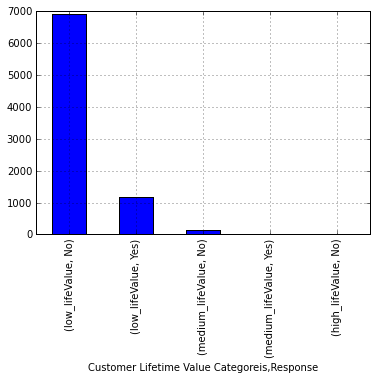

In [195]:
#Lifetime value and Response
customer_value = data['Customer Lifetime Value']
customer_value.fillna(customer_value.mean())
min_customer_value = min(customer_value)
max_customer_value = max(customer_value)
bins = list(np.linspace(min_customer_value,max_customer_value,num=4,endpoint=True))
bins[0]=min_customer_value
bins[3]=max_customer_value
group_names = ['low_lifeValue','medium_lifeValue','high_lifeValue']
pprint(zip(group_names,zip(bins,bins[1:])))
categories = pd.cut(customer_value, bins, labels=group_names,include_lowest=True)
data['Customer Lifetime Value Categoreis'] = categories
data.groupby(['Customer Lifetime Value Categoreis','Response']).size().plot(kind='bar',grid=True)

[('low_premiumValue', (61, 140.0)),
 ('medium_premiumValue', (140.0, 219.0)),
 ('high_premiumValue', (219.0, 298))]


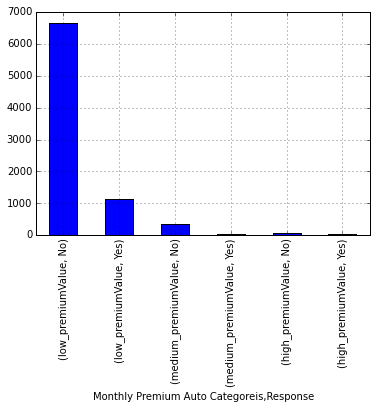

In [221]:
#Monthly Premium Auto and Response
monthly_premium_value = data['Monthly Premium Auto']
monthly_premium_value.fillna(monthly_premium_value.mean())
min_monthly_premium_value = min(monthly_premium_value)
max_monthly_premium_value = max(monthly_premium_value)
bins = list(np.linspace(min_monthly_premium_value,max_monthly_premium_value,num=4,endpoint=True))
bins[0]=min_monthly_premium_value
bins[3]=max_monthly_premium_value
group_names = ['low_premiumValue','medium_premiumValue','high_premiumValue']
pprint(zip(group_names,zip(bins,bins[1:])))
categories = pd.cut(monthly_premium_value, bins, labels=group_names,include_lowest=True)
data['Monthly Premium Auto Categoreis'] = categories
data.groupby(['Monthly Premium Auto Categoreis','Response']).size().plot(kind='bar',grid=True)

In [214]:
# Who claims how much Money based on customer education and Employment
claims = data.pivot_table(values=['Total Claim Amount'], index=['Education','EmploymentStatus'], 
                     aggfunc=np.mean)
print claims

                                       Total Claim Amount
Education            EmploymentStatus                    
Bachelor             Disabled                  463.150681
                     Employed                  355.674091
                     Medical Leave             499.282688
                     Retired                   511.855842
                     Unemployed                574.274938
College              Disabled                  442.949408
                     Employed                  351.556068
                     Medical Leave             481.256749
                     Retired                   469.031916
                     Unemployed                571.875795
Doctor               Disabled                  322.289065
                     Employed                  317.293937
                     Medical Leave             440.415101
                     Retired                   297.600000
                     Unemployed                428.172560
High School or

In [211]:
# Who claims how much Money based on customer Location
claims = data.pivot_table(values=['Total Claim Amount'], index=['State','Location Code'], 
                     aggfunc=np.mean)
print claims

                          Total Claim Amount
State      Location Code                    
Arizona    Rural                  111.641754
           Suburban               546.020651
           Urban                  326.744826
California Rural                  108.764409
           Suburban               564.780229
           Urban                  334.774506
Nevada     Rural                  110.311190
           Suburban               573.989820
           Urban                  339.475386
Oregon     Rural                  107.837276
           Suburban               563.760363
           Urban                  325.090035
Washington Rural                  116.486978
           Suburban               557.417823
           Urban                  338.193853


In [215]:
# Who claims how much Money based on customer Marital Status, Gender and Income
claims = data.pivot_table(values=['Total Claim Amount'], index=['Gender','Marital Status','IncomeCategories'], 
                     aggfunc=np.mean)
print claims

                                        Total Claim Amount
Gender Marital Status IncomeCategories                    
F      Divorced       veryLow_income            497.601853
                      low_income                409.277297
                      medium_income             399.434405
                      high_income               280.855948
                      veryHigh_income           268.890043
       Married        veryLow_income            458.992041
                      low_income                391.280905
                      medium_income             331.917031
                      high_income               323.678403
                      veryHigh_income           306.864825
       Single         veryLow_income            639.196360
                      low_income                419.607517
                      medium_income             406.764483
                      high_income               297.622271
                      veryHigh_income           324.7261